# Assignment 1

## Formalia:

Please read the [assignment overview page](https://github.com/suneman/socialdata2023/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Monday February 27th, 2023 at 23:55. Hand in your files via [http://peergrade.io](http://peergrade.io/).

**Peergrading date and time**: _Remember that after handing in you have 1 week to evaluate a few assignments written by other members of the class_. 

## A1 Part 1: Visualizing patterns in the data

In this sub-assignment, we recreate some of the plots from Week 2. We look only at the focus-crimes.

In [5]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

For each set of plots below, describe the plots (as you would in the figure text in a report or paper), and pick a few aspects that stand out to you and comment on those (we provided a couple of ideas during class but it's OK to add more).

* First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2).
* Next choose a crime type that you like and create a calendar plot (Week 2, Part 4). Don't forget to comment on patterns you observe.
* Finally, choose a different crime type and create a polar plot of its 24hour cycle (Week 2, Part 4). Again, don't forget to comment as you would in a figure text.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Please Specify the the path to the Data Department Police. <br>
Alternatively, please copy the csv in the current folder. <br>
Be patient, it takes arround 3 min.

In [2]:
data_PATH = 'Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
df = pd.read_csv(data_PATH, parse_dates=[['Date', 'Time']])

#### First create the week-day plots, the months, the 24-hour cycle, and the 168 hours of the week as barcharts (Week 2, Part 2)

# Day of the Week Plots

In [3]:
df['Year'] = pd.DatetimeIndex(df['Date_Time']).year
df['DayOfWeek'] = df['Date_Time'].dt.weekday

In [6]:
df_week_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'DayOfWeek']).size().unstack()
df_week_grouped

DayOfWeek,0,1,2,3,4,5,6
Category,,,,,,,
ASSAULT,22727,22537,22735,22226,24471,26319,26027
BURGLARY,13011,13081,13404,13454,15515,11885,10717
DISORDERLY CONDUCT,1468,1561,1590,1434,1217,1380,1282
DRIVING UNDER THE INFLUENCE,648,585,586,693,874,1150,1116
DRUG/NARCOTIC,16640,18765,20368,18272,16243,14135,13398
DRUNKENNESS,1185,1098,1175,1145,1427,1841,1889
LARCENY/THEFT,63852,65424,66905,67356,74365,74167,65906
PROSTITUTION,1129,3018,3296,3636,2781,1577,1064
ROBBERY,7748,7558,7568,7547,7810,8248,7988


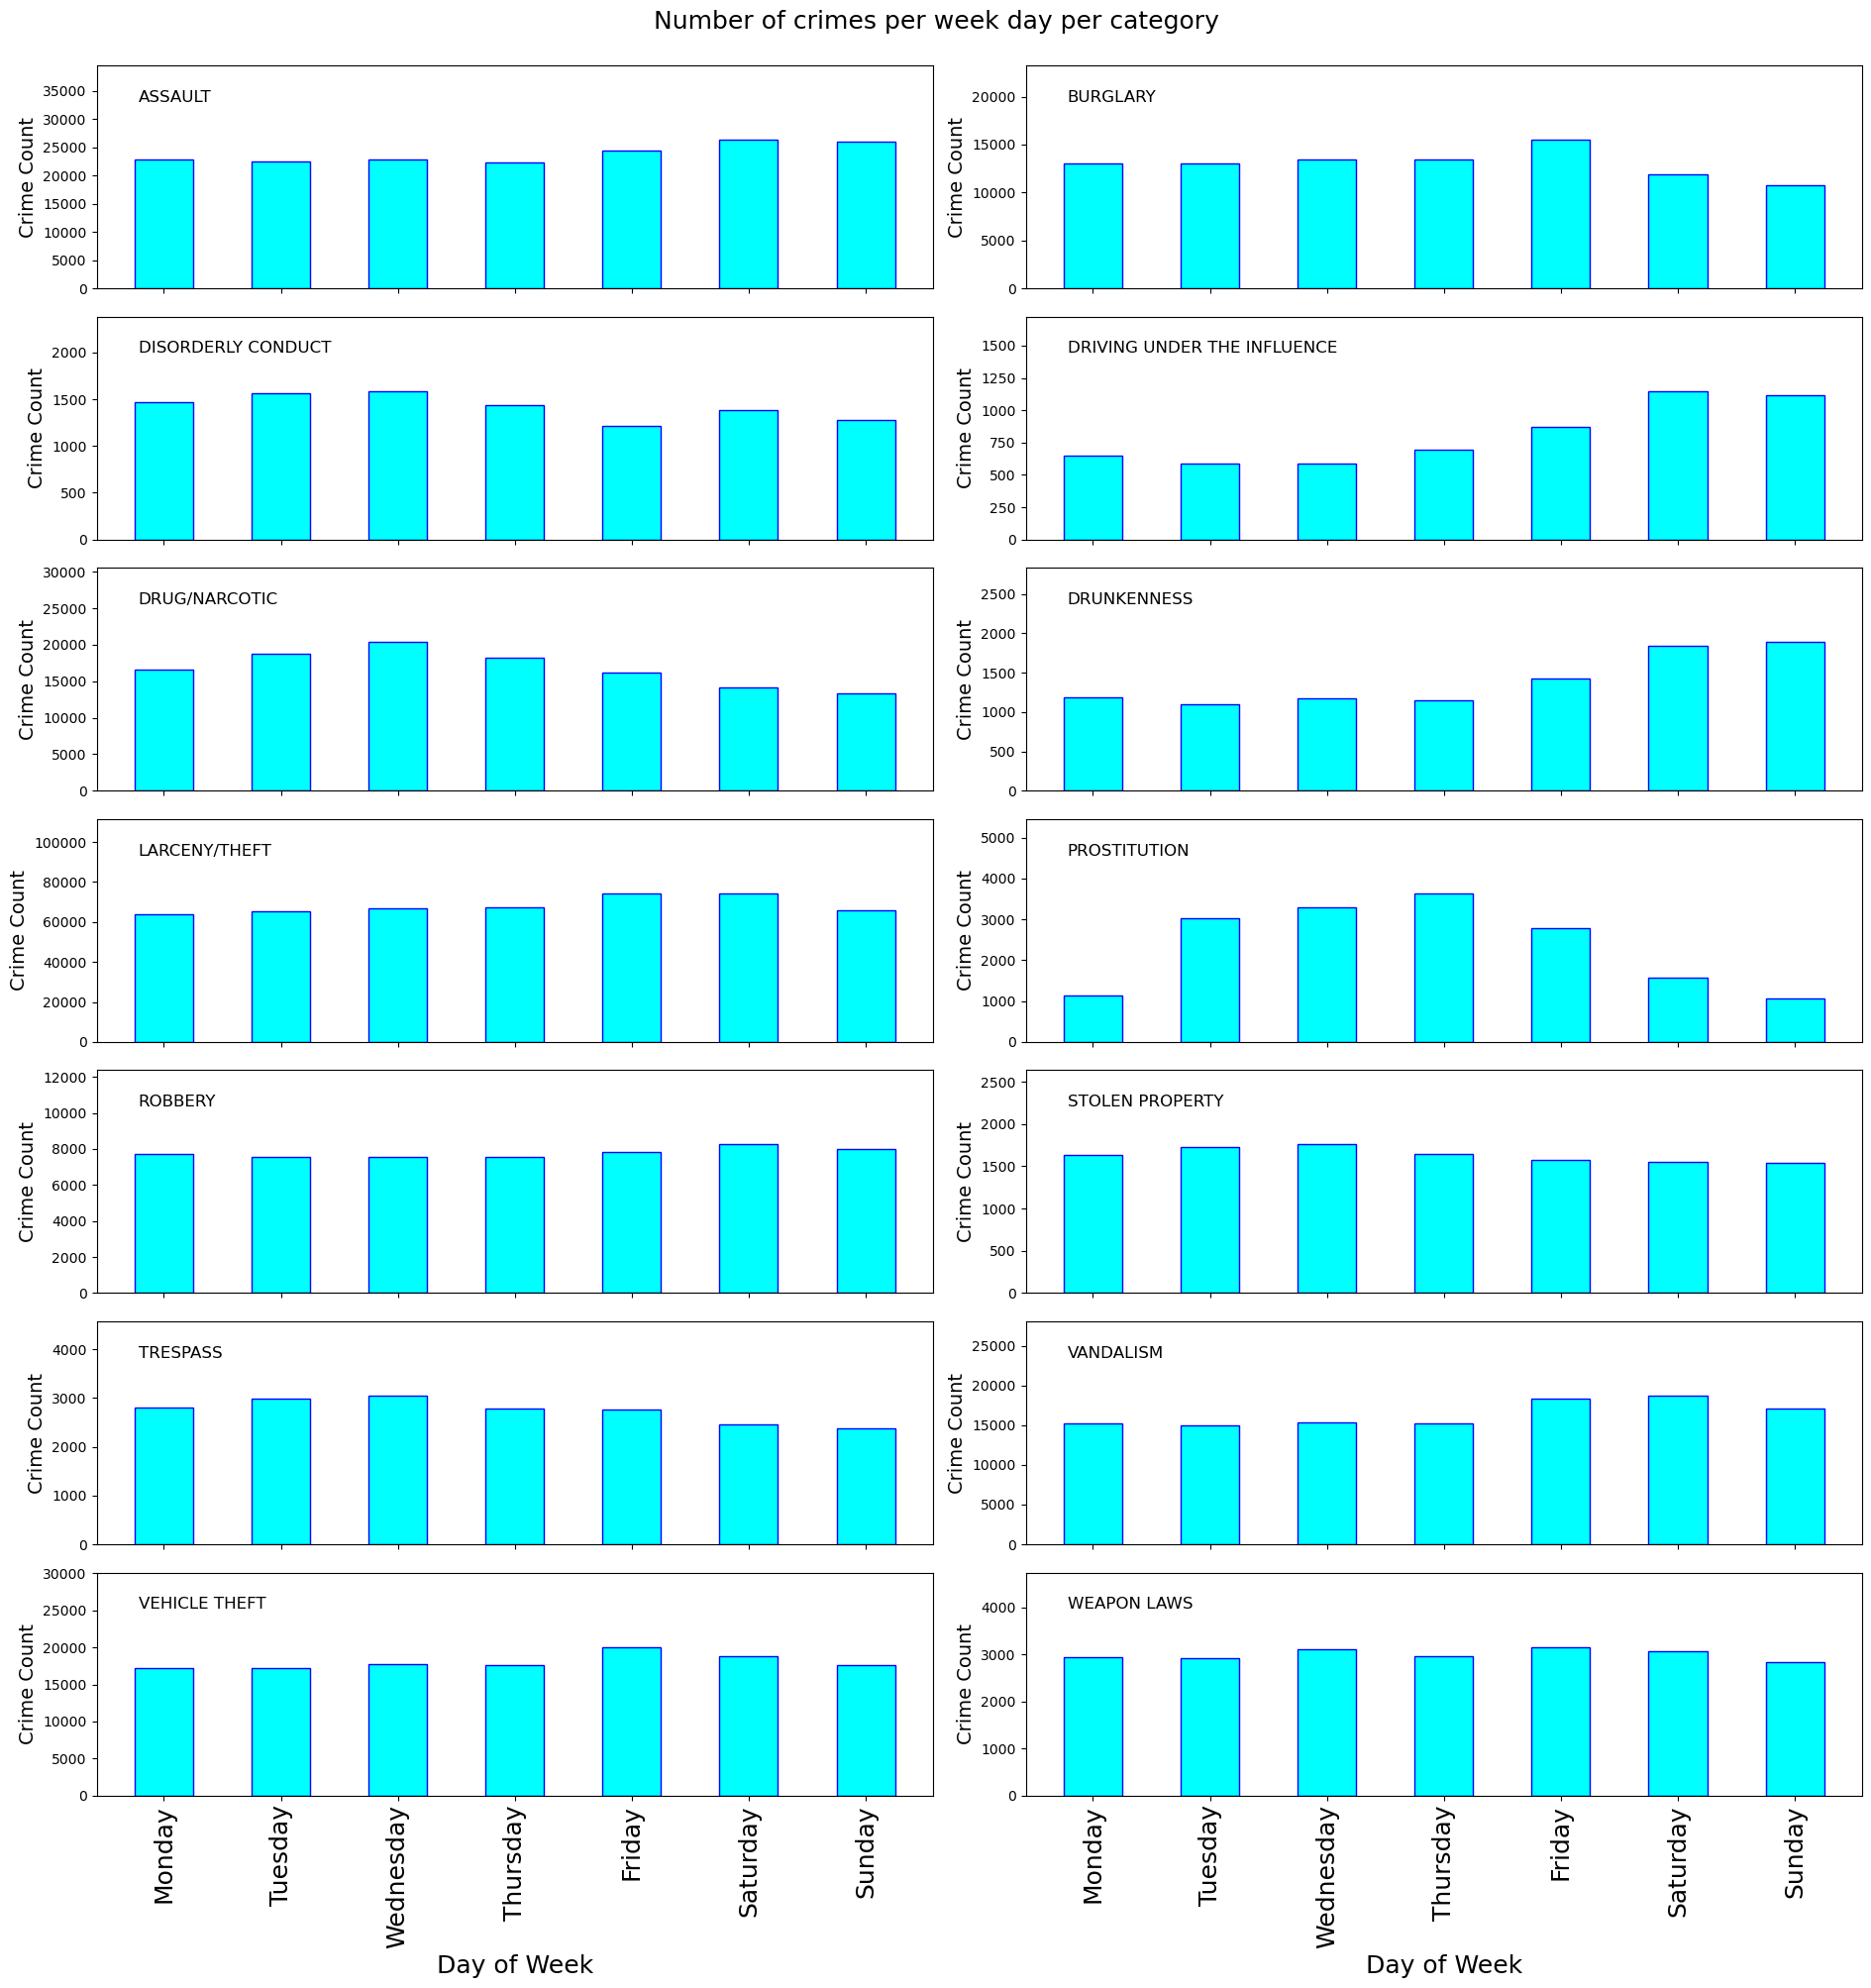

In [8]:
x_values = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per week day per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_week_grouped.iloc[plot_index-1].index, df_week_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_week_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Day of Week',fontsize=18)
    plt.xticks(df_week_grouped.iloc[plot_index-1].index,x_values, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_week_grouped.iloc[plot_index-1])+(np.max(df_week_grouped.iloc[plot_index-1])*0.5)))
    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

According to the day of week plots, we noticed a high number of the prostitution crimes between Tuesday to Friday reaching a peak at roughly 4000 crimes in total on Thursdays. This trend is quite interesting because we expected that the majority of these crimes to happen on weekends. One explanation is that the police has more time to investigate these type of crimes on weekdays due to the fact that it takes more organization and time to deal with such crimes.

Regarding to the Drug/Narcotic category, it follows similar trend with the previous category of crime having the highest number of crimes on weekdays. We suppose that the explanation of this phenomenon is the same as the Prostitution category. 


Remarkable is the fact that the Larcany/Theft category has the highest amount of reported crimes in the week making it the most common type of crime. Specifically, the Larcany/Theft crimes are above 60000 for every day of the week in total. On the contrary, the driving under influence category present the smallest number of crimes compared to the rest of the categories.

On the other hand, the driving under influence, vandalism, assault and drunknness categories follow the trend as we expected having the peak on weekends. The alcohol consumption could be one reason of committing these types of crime which is proven by a lot of studies. 

Finally, it is worth noting that the majority of burglaries happen on Fridays. We suppose that this day is a very popular day for real estate burglaries because inhabitants likely go out after work for a drink or for a party. 

# Monthly plots

In [9]:
df['month'] = pd.DatetimeIndex(df['Date_Time']).month
df_month_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'month']).size().unstack()
df_month_grouped

month,1,2,3,4,5,6,7,8,9,10,11,12
Category,,,,,,,,,,,,
ASSAULT,14412,13329,15045,14477,14254,13499,13560,13933,14407,14581,13009,12536
BURGLARY,8090,7121,8173,7933,7786,7060,7604,7513,7174,7423,7441,7749
DISORDERLY CONDUCT,888,808,899,817,897,753,791,847,863,841,844,684
DRIVING UNDER THE INFLUENCE,477,498,528,445,513,383,428,471,487,479,479,464
DRUG/NARCOTIC,11267,10672,11199,9970,9939,8636,8994,10099,9684,9973,9195,8193
DRUNKENNESS,845,756,860,801,872,775,785,854,809,908,739,756
LARCENY/THEFT,41616,36973,40953,40065,39271,38023,40762,41501,40136,41581,38424,38670
PROSTITUTION,1631,1428,1310,1504,1366,1201,1246,1299,1528,1353,1366,1269
ROBBERY,4763,4128,4436,4637,4613,4568,4570,4834,4410,4817,4354,4337


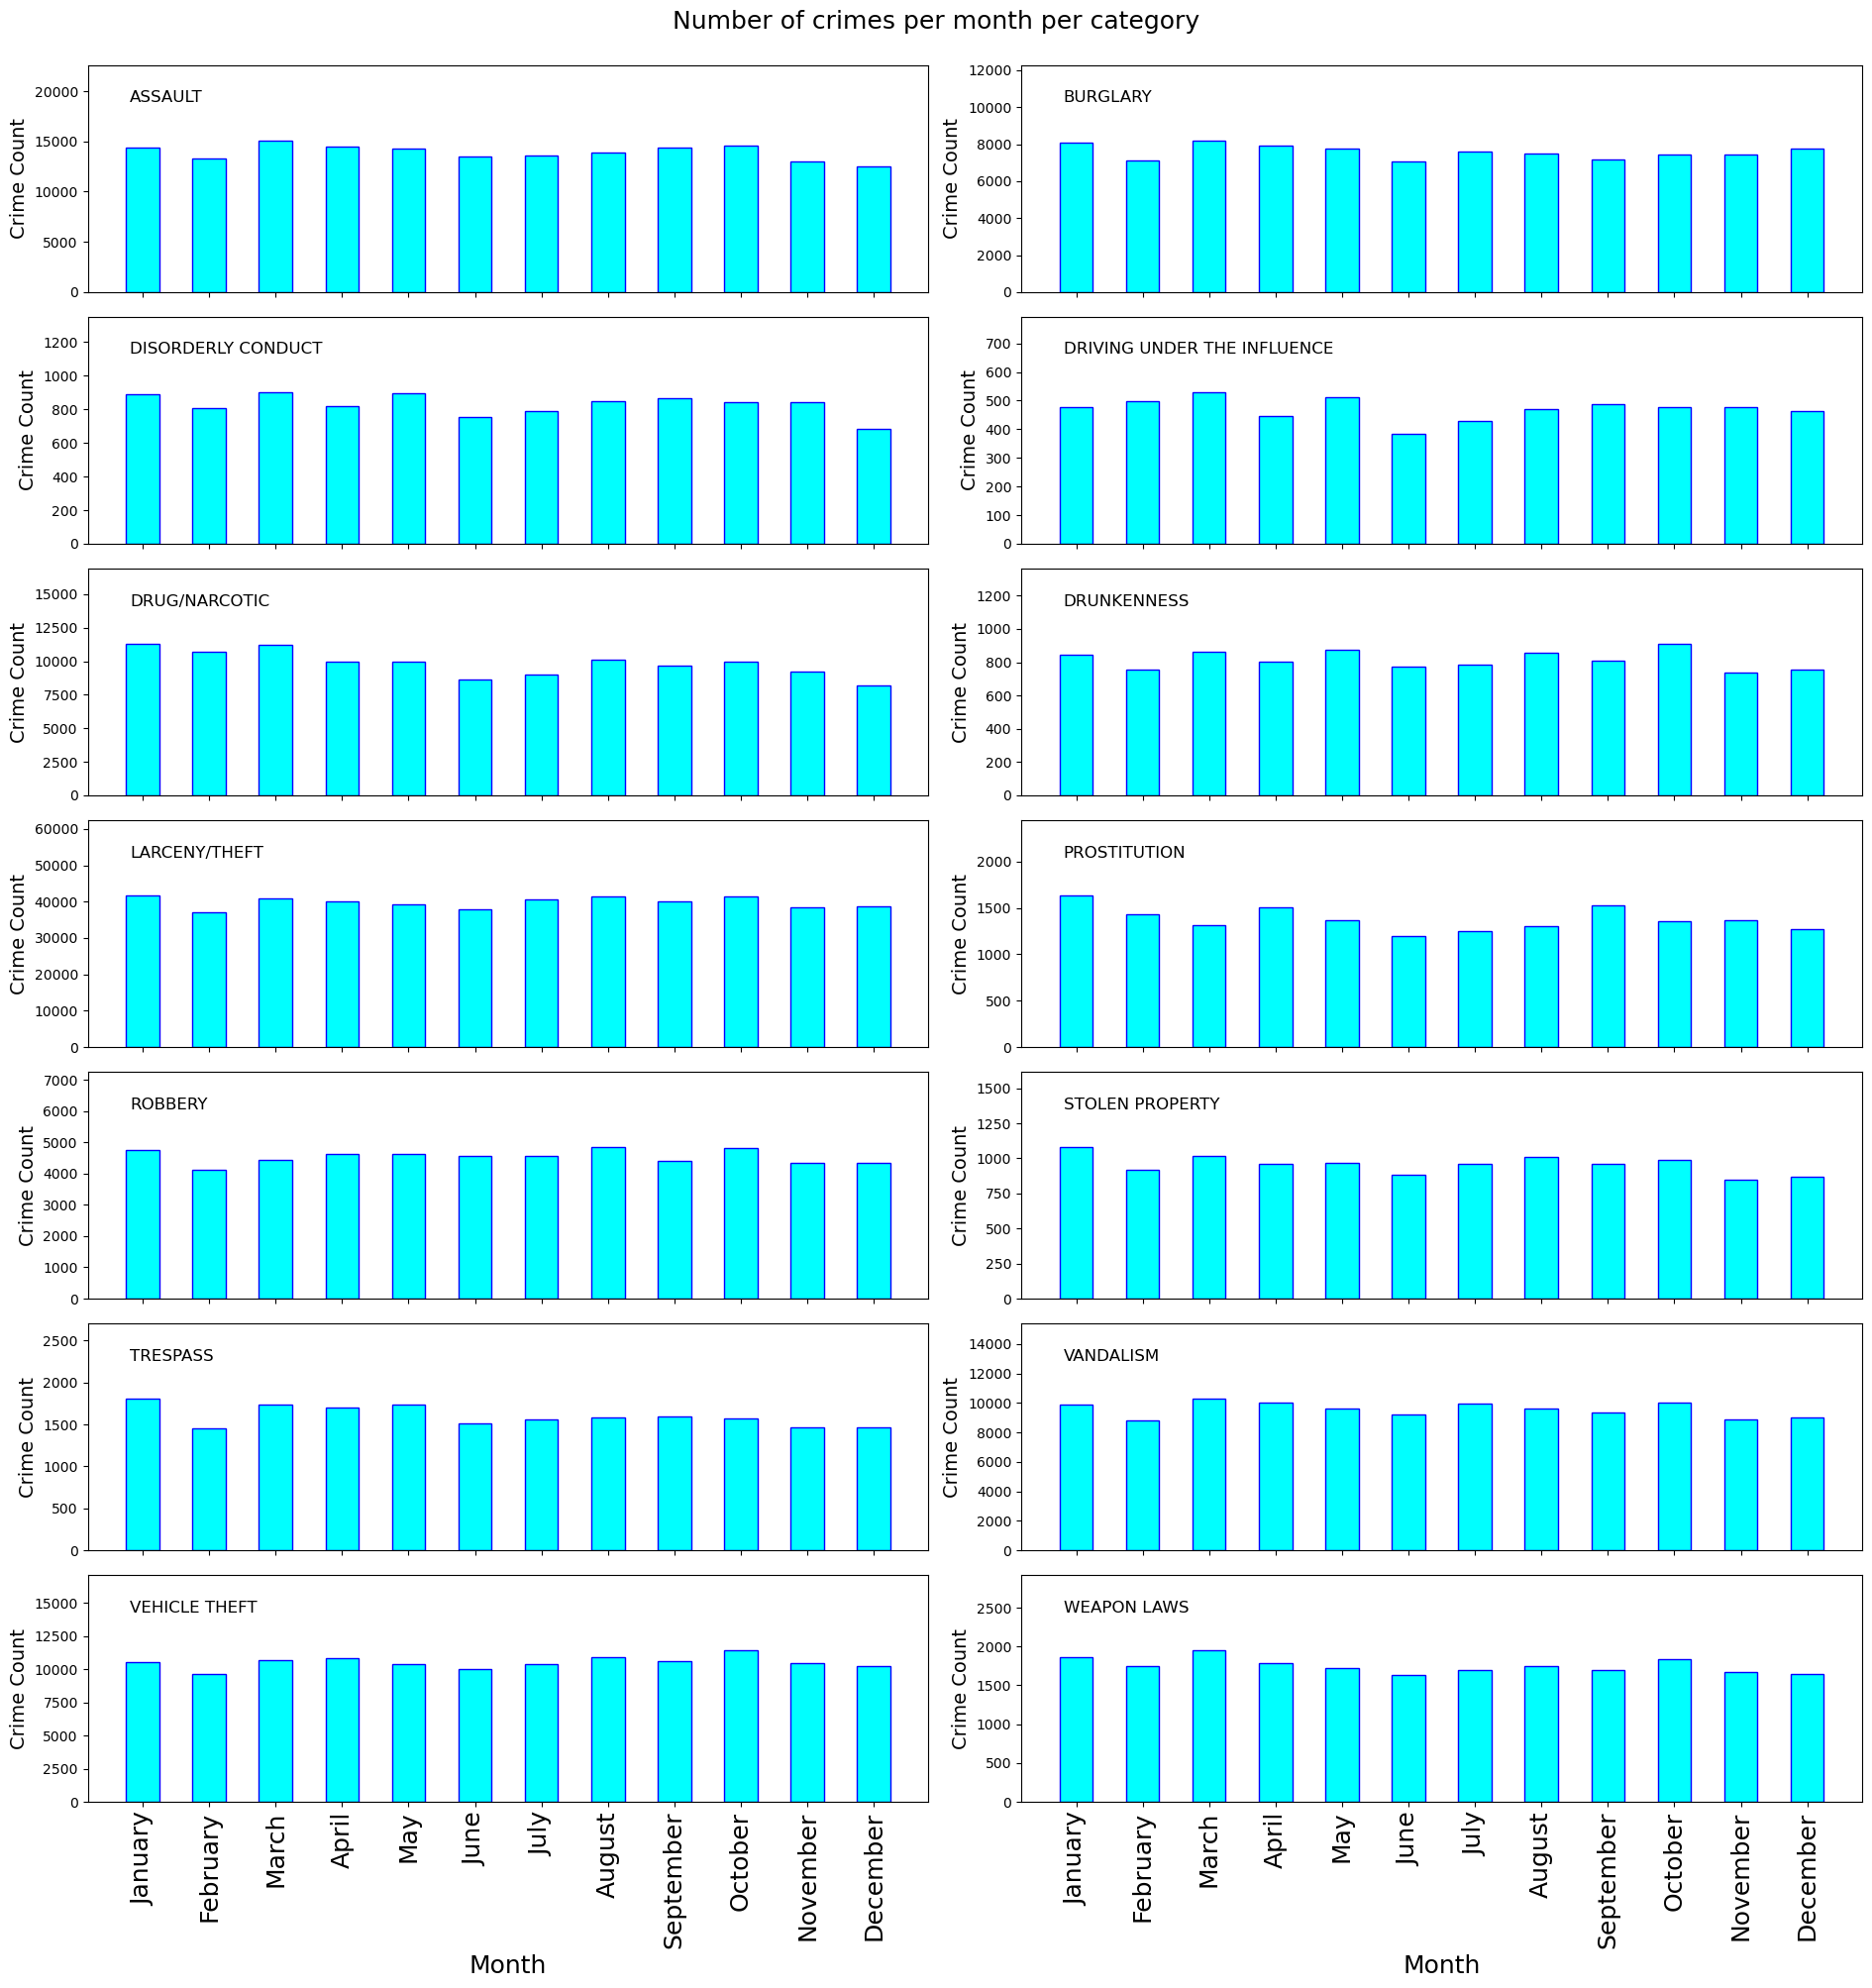

In [10]:
x_values = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per month per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_month_grouped.iloc[plot_index-1].index, df_month_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_month_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Month',fontsize=18)
    plt.xticks(df_month_grouped.iloc[plot_index-1].index,x_values, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_month_grouped.iloc[plot_index-1])+(np.max(df_month_grouped.iloc[plot_index-1])*0.5)))

    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

Looking at the monthly plots, we can notice that many crimes are slightly reduced in the first two winter and summer months. Namely in November and December, many crimes like stolen property and assault were slightly reduced. Regarding to the summer months, many crimes like Dryg/Narcotic and Prostitution hit a trough in June and July. 

In addition, in February there is a decrease in incidents in many categories of crimes leke burglary and trespass but considering that February has 2 to 3 days less than the rest of the months we need more analysis to prove it.

# 24-hour cycle plots

In [11]:
df['Hour'] = pd.DatetimeIndex(df['Date_Time']).hour
hours_in_day = [i for i in range(0,24)]
hourly_slots = {}
for i in range(len(hours_in_day)):
    if i+1 == len(hours_in_day):
        from_time = hours_in_day[i]
        to_time = hours_in_day[0]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    else:
        from_time = hours_in_day[i]
        to_time = hours_in_day[i+1]
        hourly_slots[from_time] = str(from_time) + "-" + str(to_time)
    
print(hourly_slots)

{0: '0-1', 1: '1-2', 2: '2-3', 3: '3-4', 4: '4-5', 5: '5-6', 6: '6-7', 7: '7-8', 8: '8-9', 9: '9-10', 10: '10-11', 11: '11-12', 12: '12-13', 13: '13-14', 14: '14-15', 15: '15-16', 16: '16-17', 17: '17-18', 18: '18-19', 19: '19-20', 20: '20-21', 21: '21-22', 22: '22-23', 23: '23-0'}


In [12]:
list_hourly_slots = list(hourly_slots.values())
list_hourly_slots[0]

'0-1'

In [13]:
df['hour'] = pd.DatetimeIndex(df['Date_Time']).hour
df_hour_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'hour']).size().unstack()
df_hour_grouped

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Category,,,,,,,,,,,,,,,,,,,,,
ASSAULT,9048,8233,7387,3627,2284,1817,2454,3616,5546,6207,...,8105,9030,8943,8991,8849,8573,8325,8649,8251,7905
BURGLARY,3482,2258,2436,2515,2229,2036,2038,3149,4876,4274,...,3619,4233,4721,6320,6380,4798,4200,4053,3854,3566
DISORDERLY CONDUCT,519,382,343,216,160,397,1007,913,682,514,...,349,331,306,291,325,268,249,284,386,411
DRIVING UNDER THE INFLUENCE,711,649,652,289,107,62,70,47,46,58,...,78,105,147,183,193,238,285,379,512,640
DRUG/NARCOTIC,3719,2274,1843,1249,910,474,1328,3026,3990,4666,...,8846,8203,8590,8799,7825,6659,5063,4754,5704,4850
DRUNKENNESS,826,779,663,258,132,45,81,164,153,174,...,327,361,435,508,572,548,569,620,748,740
LARCENY/THEFT,19100,11781,7671,4819,3136,3152,4956,7792,13217,15682,...,25250,26793,28046,31992,38362,36012,31430,26489,25806,23412
PROSTITUTION,1350,1048,777,543,465,574,516,268,151,155,...,305,238,288,599,1162,1355,1075,1274,1569,1575
ROBBERY,2942,3036,3171,1911,1237,1069,1037,922,1034,1237,...,2129,2385,2629,2613,2782,2977,3356,3798,3765,3505


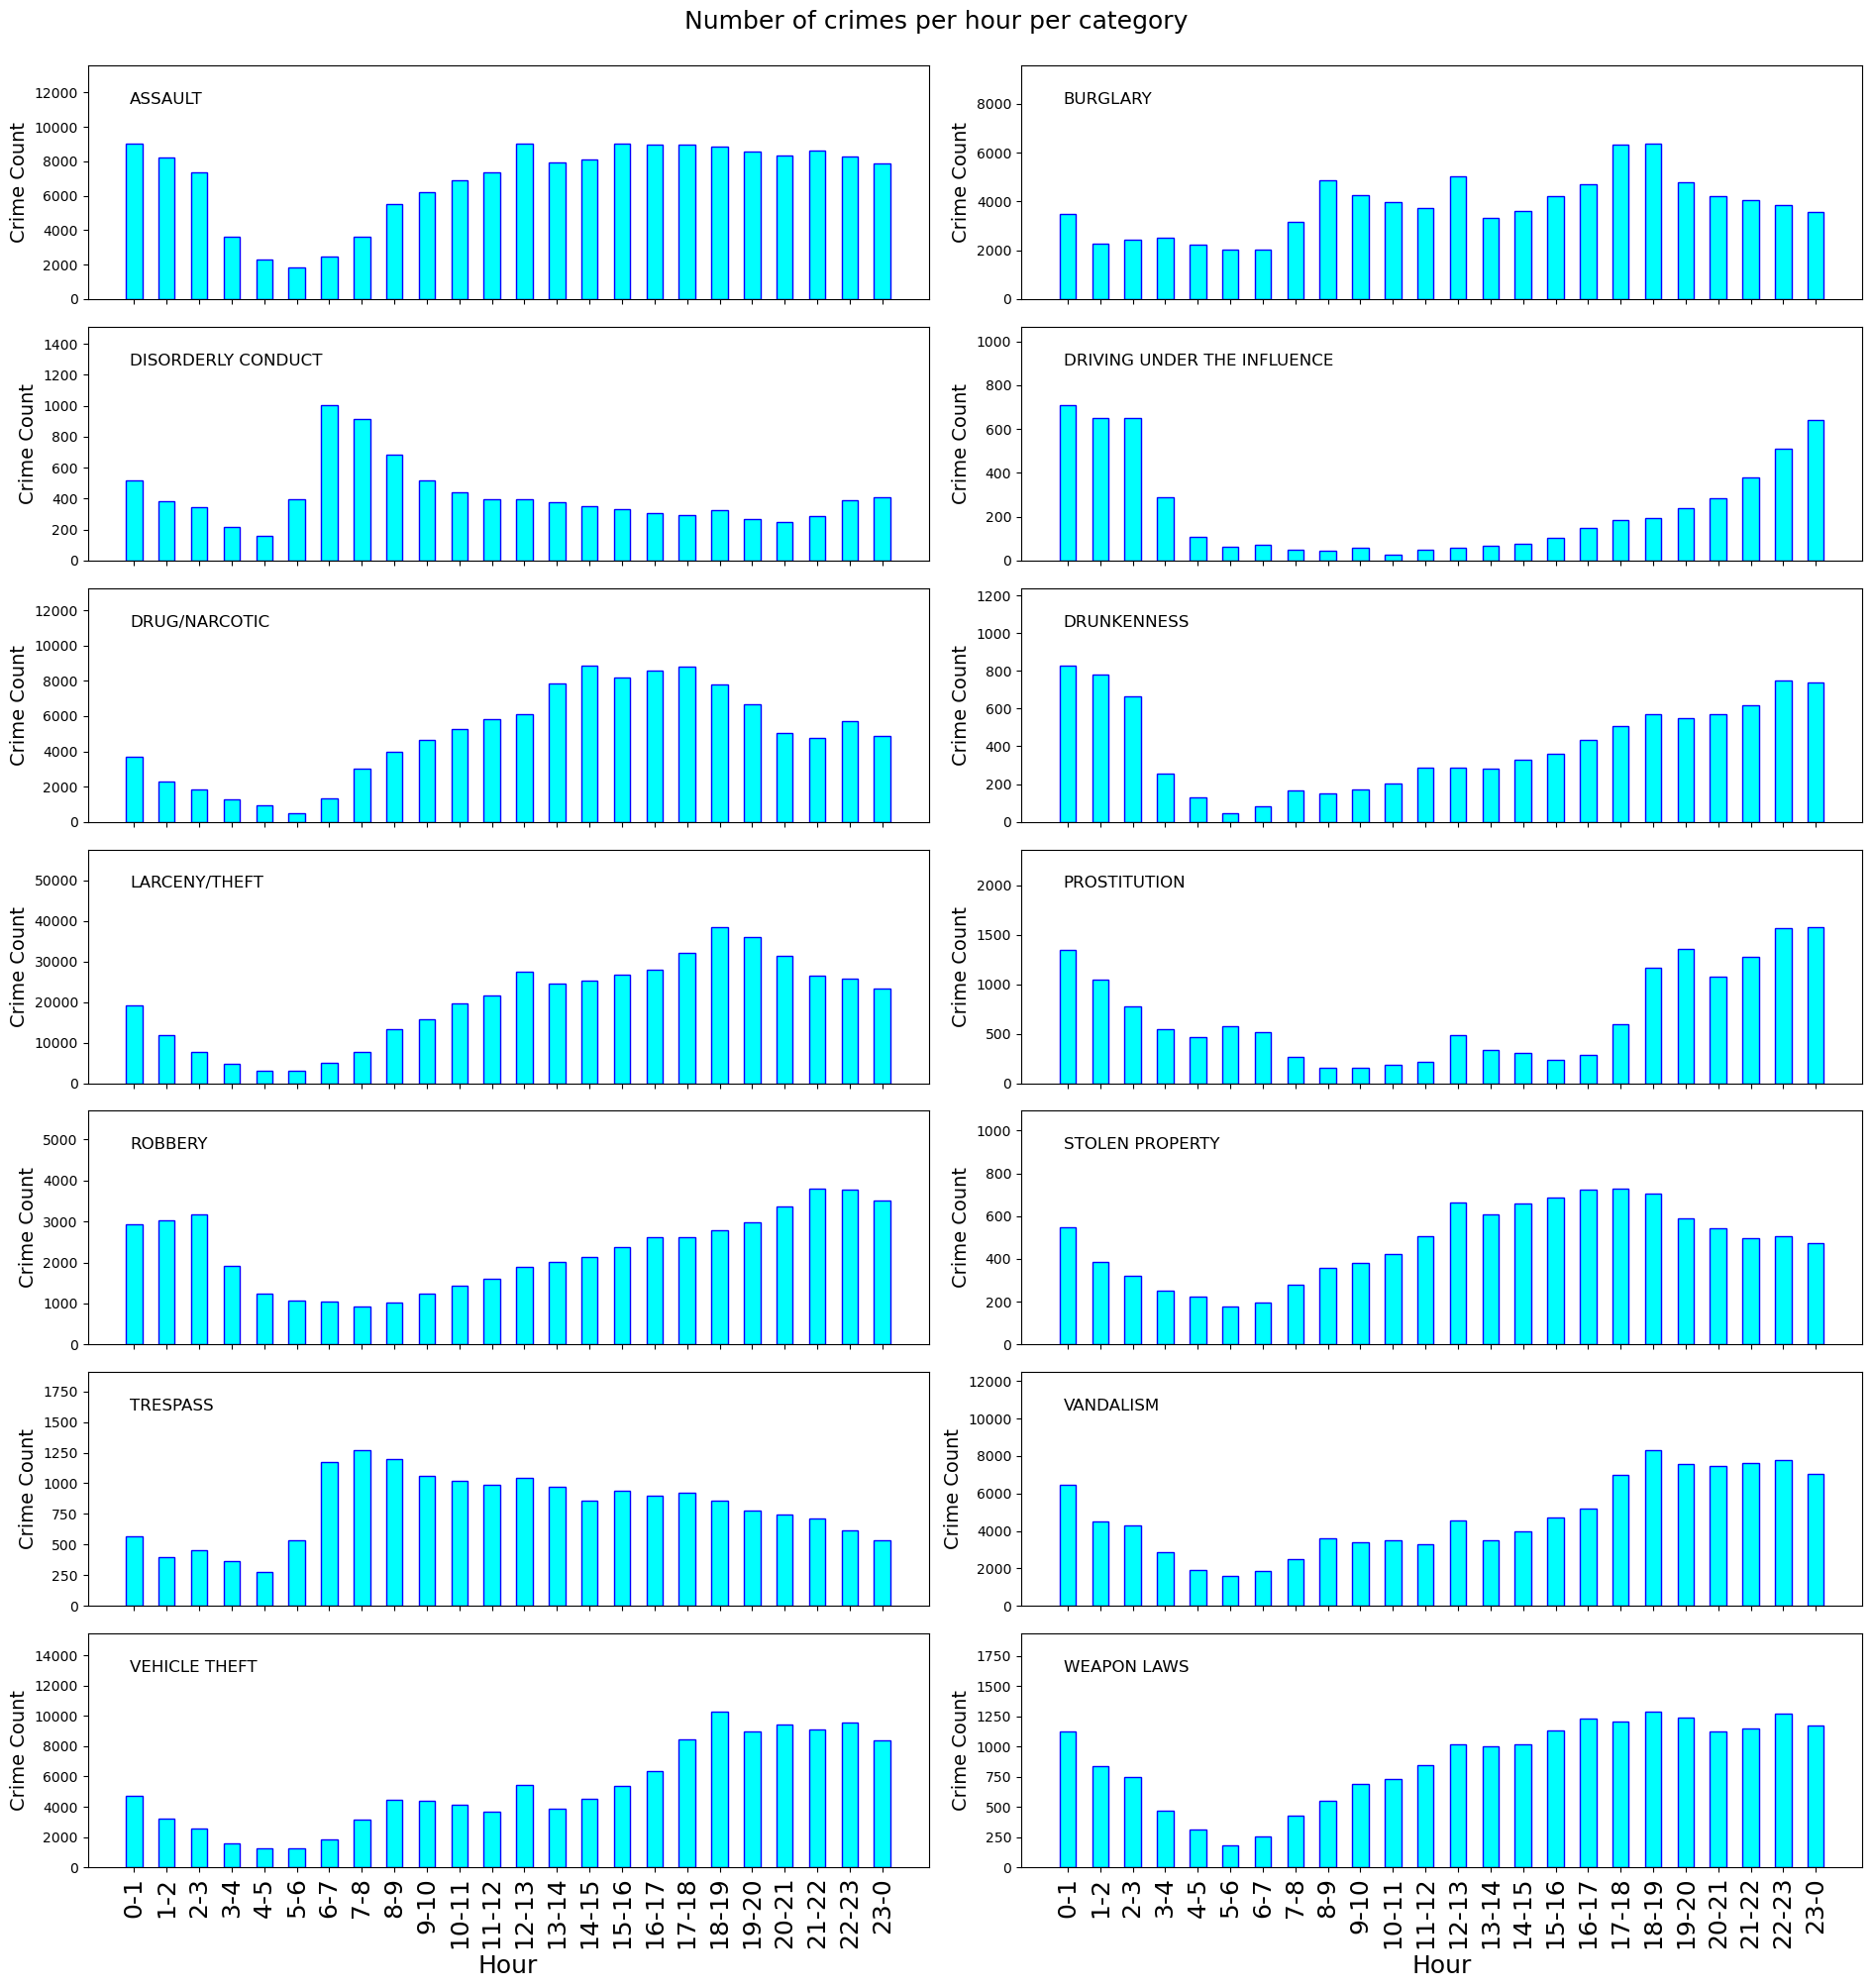

In [14]:

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per hour per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_hour_grouped.iloc[plot_index-1].index, df_hour_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_hour_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Hour',fontsize=18)
    plt.xticks(df_hour_grouped.iloc[plot_index-1].index,list_hourly_slots, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_hour_grouped.iloc[plot_index-1])+(np.max(df_hour_grouped.iloc[plot_index-1])*0.5)))
    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

Regarding to the hourly plots, the majority types of crimes present the smallest number of incidents at around 4-6 am in the morning. This makes sense, taking into account that there are less people on the street, therefore the incidents are very few. 

It is worth noting that the number of crimes in the Trespass and Disorderly Conduct categories show a sharp increase after 6 am.

In addition, looking at the plots we can notice that drunkneess follows similiar patterns like vandalism, drunkneess, driving under influence and prostitution having the largest number of incidents at night as we expected.  This may again confirm that the alcohol or drunk people may lead to carry out these type of crimes.

Taking these plots into account, we can say that the safest hour to be outside of your house should be between 4 and 6 am. To confirm or reject this hypothesis we need further analysis because we haven't include a significant parameter that this time there are a lot less people on the street, therefore may be more incidents per person.



# Hours of the week plots

In [15]:
df["hour_of_week"] = df["Date_Time"].dt.dayofweek * 24 + (df["Date_Time"].dt.hour+1)
df.head()

,Date_Time,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,...,Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,month,Hour,hour,hour_of_week
0,2004-11-22 17:50:00,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",0,INGLESIDE,NONE,GENEVA AV / SANTOS ST,...,NaN,NaN,NaN,NaN,NaN,2004,11,17,17,18
1,2005-10-18 20:00:00,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,1,PARK,NONE,TURK ST / STJOSEPHS AV,...,NaN,NaN,NaN,NaN,NaN,2005,10,20,20,45
2,2004-02-15 02:00:00,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,6,SOUTHERN,NONE,BRANNAN ST / 1ST ST,...,NaN,NaN,NaN,NaN,NaN,2004,2,2,2,147
3,2011-02-18 05:27:00,11014543126030,110145431,26030,ARSON,ARSON,4,INGLESIDE,NONE,0 Block of SANJUAN AV,...,NaN,NaN,NaN,NaN,94.0,2011,2,5,5,102
4,2010-11-21 17:00:00,10108108004134,101081080,4134,ASSAULT,BATTERY,6,SOUTHERN,NONE,400 Block of 10TH ST,...,NaN,NaN,NaN,NaN,32.0,2010,11,17,17,162


In [16]:
df_hour_of_week_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'hour_of_week']).size().unstack()
df_hour_of_week_grouped

hour_of_week,1,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
Category,,,,,,,,,,,,,,,,,,,,,
ASSAULT,1130,827,789,378,284,243,328,538,872,903,...,1064,1209,1258,1291,1253,1315,1254,1301,1186,1054
BURGLARY,514,299,359,375,338,306,291,508,796,681,...,439,523,533,698,649,517,531,493,523,512
DISORDERLY CONDUCT,64,33,42,25,20,83,200,150,111,89,...,35,38,50,40,48,35,36,40,48,55
DRIVING UNDER THE INFLUENCE,78,79,69,34,6,10,5,2,9,10,...,14,22,30,31,41,51,39,64,80,102
DRUG/NARCOTIC,523,321,246,177,154,81,197,386,528,661,...,842,732,974,1034,944,670,518,538,806,682
DRUNKENNESS,94,63,80,27,13,4,11,17,20,24,...,57,69,90,84,88,98,98,90,132,94
LARCENY/THEFT,2193,1183,852,590,435,487,753,1265,2100,2383,...,3866,4024,4024,4265,4372,3949,3630,3100,3161,2506
PROSTITUTION,136,81,64,48,36,38,51,25,13,13,...,3,2,6,8,16,33,24,39,69,99
ROBBERY,374,347,345,196,153,171,140,112,163,197,...,272,269,341,338,326,382,460,470,502,483


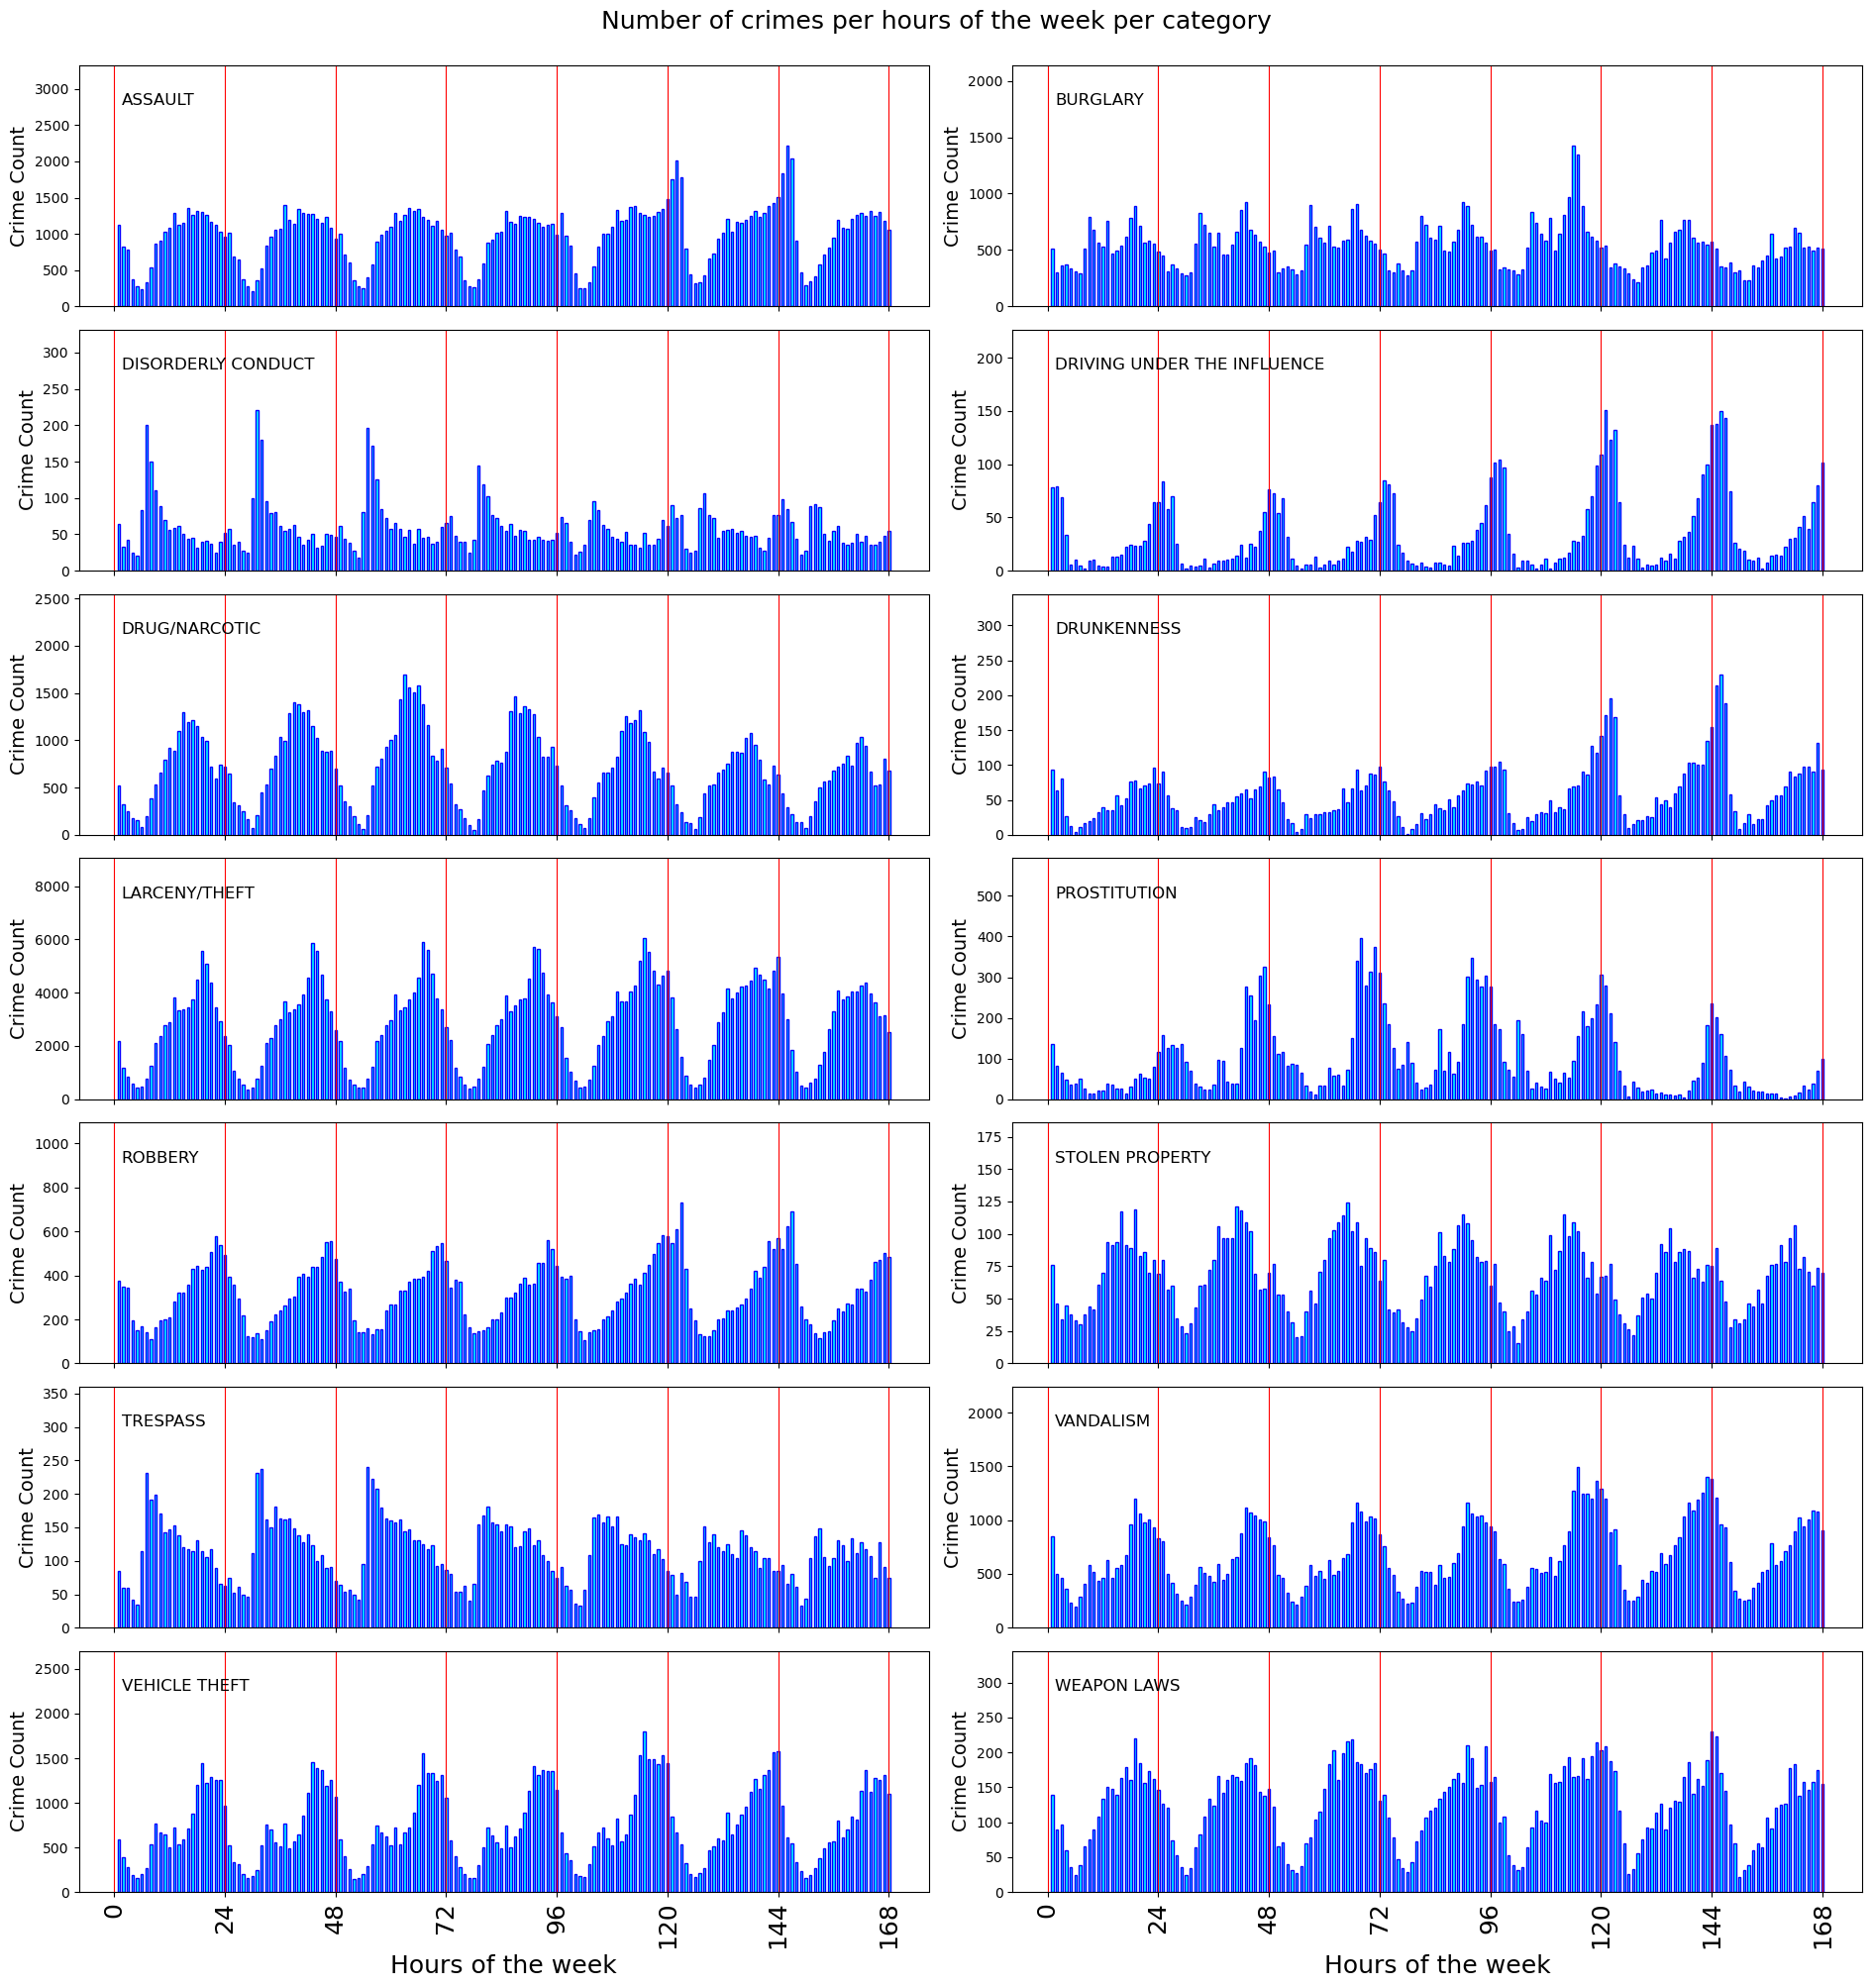

In [17]:
x_position = [0,24,48,72,96,120,144,168]

fig = plt.figure(figsize=(19, 20))
fig.suptitle('Number of crimes per hours of the week per category',y=1.001, fontsize=18)

for plot_index in range(1,len(focuscrimes)+1):
    # Creating a subplot placeholder corresponding to a category
    fig = plt.subplot(int(len(focuscrimes)/2),2,plot_index)
    # Make a space between the different rows of plots
    plt.subplots_adjust(hspace = 0.55)

    # P.S. I can of course remove the labels from all but the last 2 plots, and make the x-axis year labels show from 2 to 2 years, however I kept this style, since I believe it is more beautiful this way
    
   # ax = sb.barplot(x = df_week_grouped.iloc[plot_index - 1].index, y = df_week_grouped.iloc[plot_index - 1].values, color = sb.color_palette()[0])
    plt.bar(df_hour_of_week_grouped.iloc[plot_index-1].index, df_hour_of_week_grouped.iloc[plot_index-1],width=0.5,edgecolor="blue",color='cyan')
    plt.margins(y = 0.25, x = 0.05) # set the inner margins between plot values and plot
    plt.title(df_hour_of_week_grouped.iloc[plot_index-1].name, y = 0.80, x = 0.05, loc = 'left')
    plt.ylabel('Crime Count',fontsize=14)
    plt.xlabel('Hours of the week',fontsize=18)
    plt.xticks(x_position,x_position, rotation=90, fontsize=18)
    plt.ylim(top=(np.max(df_hour_of_week_grouped.iloc[plot_index-1])+(np.max(df_hour_of_week_grouped.iloc[plot_index-1])*0.5)))
    plt.grid(which="major", axis="x", color="red")
    if plot_index<(len(focuscrimes)-1):
        plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        #bottom=False,      # ticks along the bottom edge are off
        top=False,          # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
        plt.xlabel("")
plt.tight_layout()
plt.show()

Whilst the majority of categories of crime follow similar pattern over the 24 hours period, there is a huge difference regarding to the peak values. According to the burglaries category, we can notice that there is a significant peak on the Friday, just around 6 pm, when people go for a drink propably. 

Looking the trend at the assaults, driving under the influence and drunkneess categories, we found out that these types of crime happen most often on Saturdays, and Sundays. Also, it is wotrth noting that these crimes are reported to happen just after mid-night in both days. 


In terms of Describe Trespass and Disorderly Conduct categories, it is quite interesting that we see a sharp increase at 6 -7  o'clock especially on the first 3 days of the week.

Finally, according to the prostitution category, it is clear that incidents increase rapidly on Tuesdays, Wednesdays and Thursdays during the evening hours after before 12 a sharp increase in incidents during the night hours after 6 pm and before 2 am as we already know from hourly and day of the week plots.

# Calendar Plot

### 1. Simple Calendar Plot

In [18]:
data_drunkeness = (df['Category'] == "DRUNKENNESS")
data_drunkeness = df.loc[data_drunkeness]

In [19]:
data_drunkeness

,Date_Time,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,...,Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,month,Hour,hour,hour_of_week
206,2006-11-08 21:27:00,6119516519090,61195165,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,2,TENDERLOIN,"ARREST, BOOKED",100 Block of HYDE ST,...,1.0,1.0,1.0,NaN,20.0,2006,11,21,21,70
392,2006-06-28 18:10:00,6068638319090,60686383,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,2,MISSION,NONE,500 Block of DOLORES ST,...,NaN,NaN,5.0,NaN,37.0,2006,6,18,18,67
601,2012-06-27 15:13:00,12050675419090,120506754,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,2,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,...,NaN,NaN,3.0,50.0,53.0,2012,6,15,15,64
905,2009-12-10 20:20:00,9126354419090,91263544,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,3,SOUTHERN,NONE,1600 Block of MARKET ST,...,1.0,1.0,1.0,NaN,32.0,2009,12,20,20,93
1233,2005-05-30 10:47:00,5060263419090,50602634,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,0,SOUTHERN,"ARREST, BOOKED",1100 Block of MARKET ST,...,1.0,1.0,1.0,35.0,32.0,2005,5,10,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128142,2017-03-14 18:30:00,17021158319090,170211583,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,1,TENDERLOIN,"ARREST, BOOKED",400 Block of TAYLOR ST,...,1.0,1.0,NaN,NaN,20.0,2017,3,18,18,43
2128831,2017-11-21 23:15:00,17094894619090,170948946,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,1,SOUTHERN,"ARREST, BOOKED",900 Block of MARKET ST,...,1.0,1.0,NaN,35.0,20.0,2017,11,23,23,48
2128884,2017-10-07 14:00:00,17081916519090,170819165,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,5,INGLESIDE,"ARREST, BOOKED",3300 Block of MISSION ST,...,NaN,NaN,NaN,NaN,83.0,2017,10,14,14,135
2129172,2017-12-29 02:50:00,17104888819090,171048888,19090,DRUNKENNESS,UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE,4,MISSION,NONE,2000 Block of MARKET ST,...,NaN,NaN,5.0,NaN,28.0,2017,12,2,2,99


In [22]:
!pip install calplot
import calplot

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

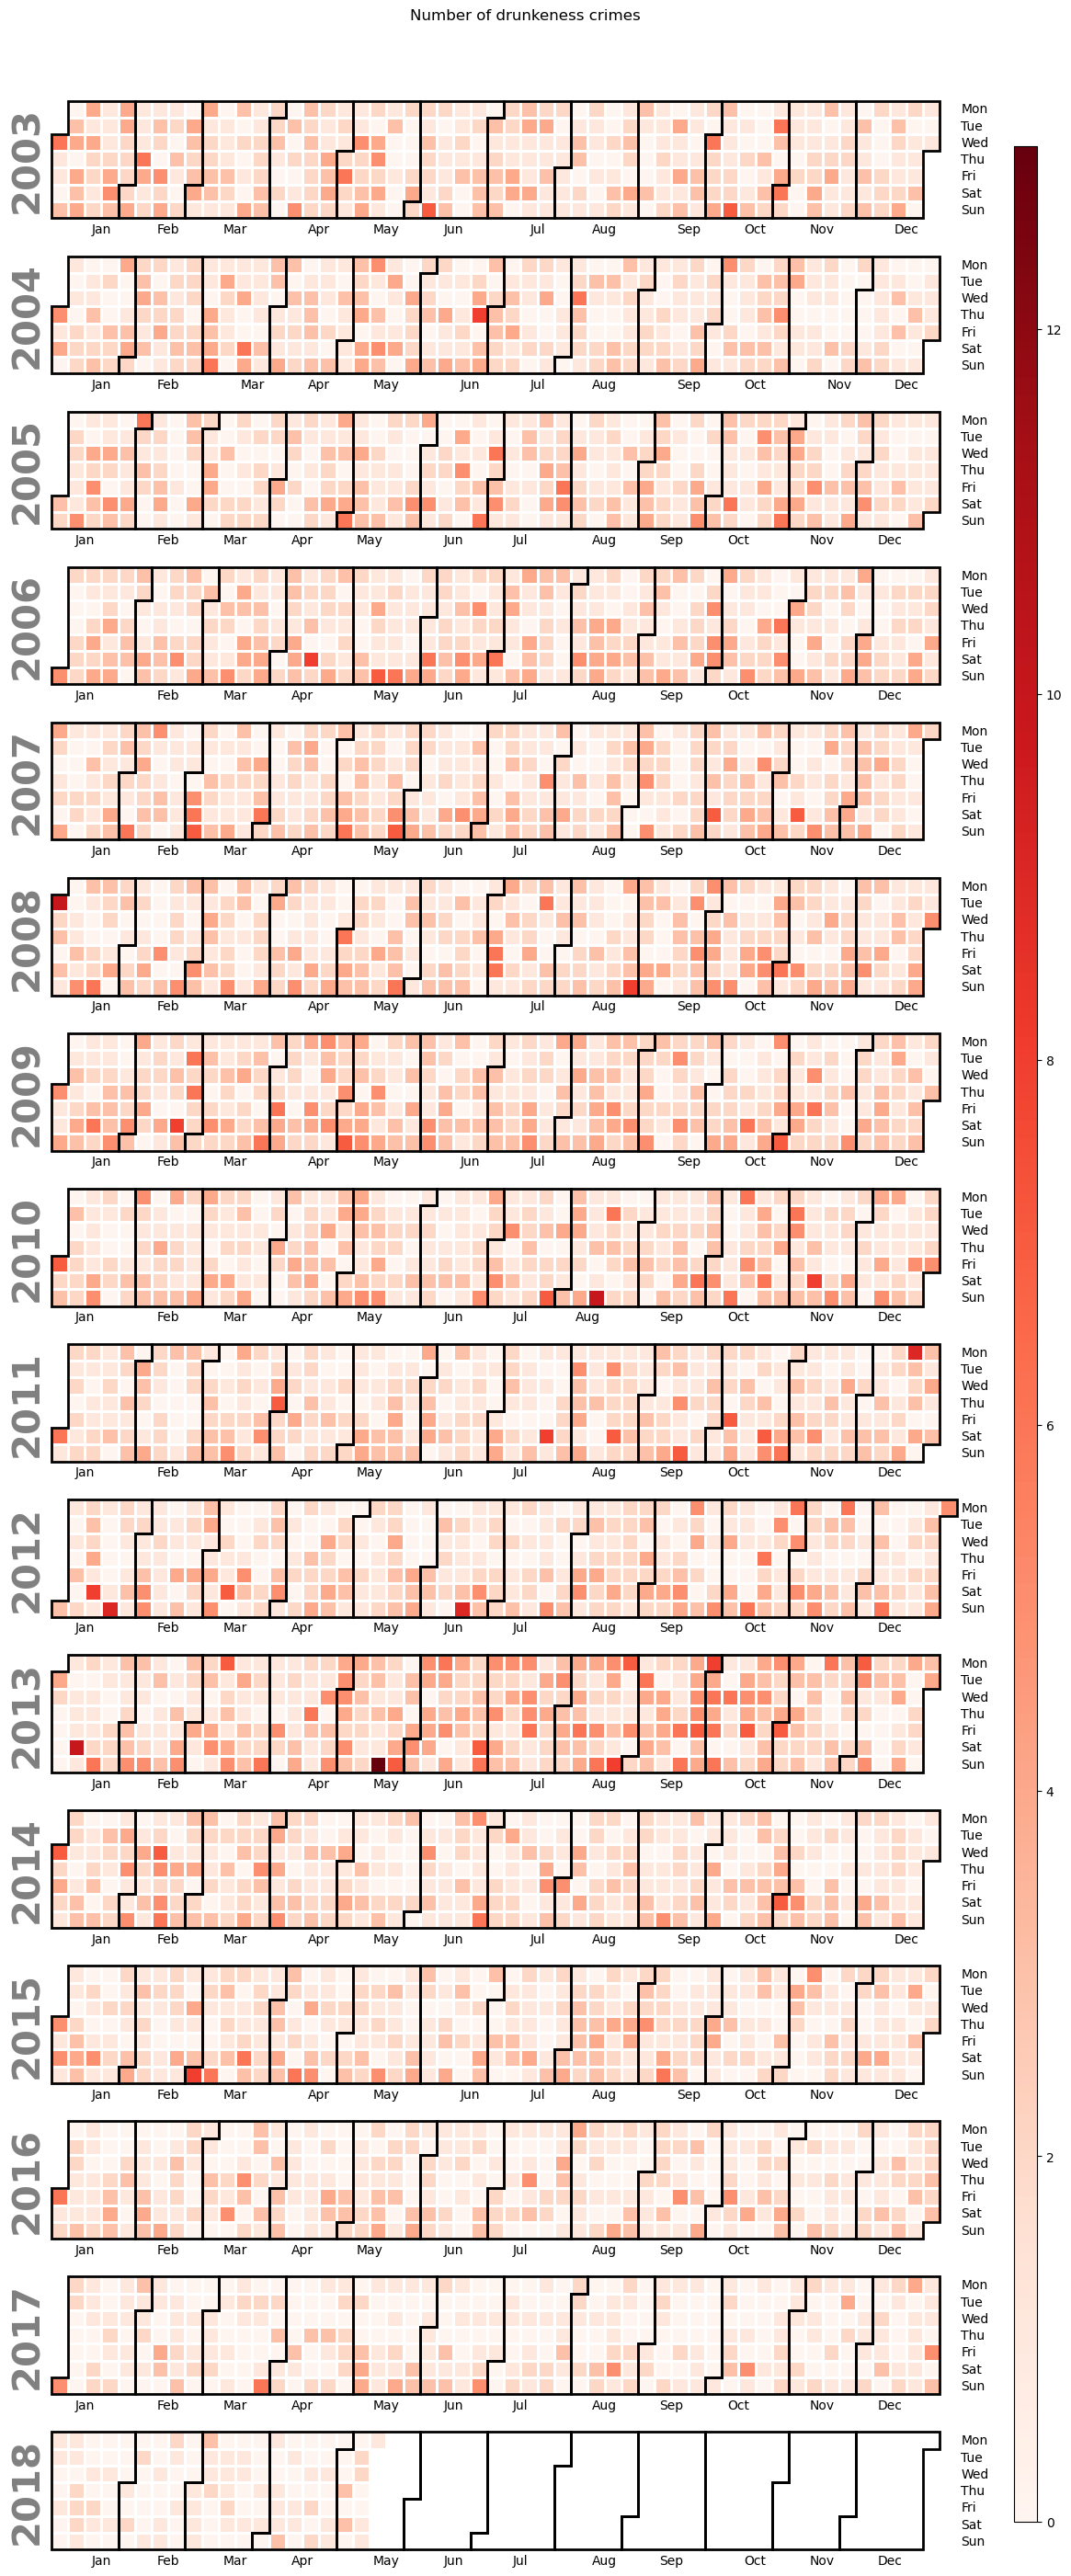

In [23]:
import pandas as pd
import calplot 
import matplotlib.pyplot as plt
import seaborn as sb


data_drunkeness.set_index('Date_Time', inplace=True)
# variables
col = 'PdId'
title = 'Number of drunkeness crimes\n'
#cmap = sb.dark_palette("#69d", as_cmap=True)
# plot
calplot.calplot(data_drunkeness[col], how='count', 
                suptitle=title, cmap='Reds',
                linecolor='w', linewidth=2, 
                fillcolor='w', edgecolor='black')
plt.show()

We can see that the whole time period in the data for the drunkneess category which is divided into years and years into months and days. On y-axis, we can see the name of the days and the color gradient shows the number of crimes. Dark red colors mean more crimes, whereas lighter red colors mean less crimes. The simplicity and clarity of this plot makes it easily understandable, yet very insightful.

From the plot above, it is easy to identify that the maximum sales have happened in the year 2013 expecially between May to October. It is worth noting that during the year 2013 the highest number of incidents occurs on the third Sunday of the month of May followed by a small decrease the following Sunday.

### 2. Interact Calendar Plot

In [25]:
!pip install ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.3/384.3 kB 1.0 MB/s eta 0:00:00a 0:00:01


In [27]:
products = set(list(data_drunkeness['PdDistrict']))
print(products)

{'NORTHERN', 'MISSION', 'CENTRAL', 'TENDERLOIN', 'BAYVIEW', 'RICHMOND', 'SOUTHERN', 'PARK', 'TARAVAL', 'INGLESIDE'}


In [28]:
def draw_calplot(prod):
   data_subset = data_drunkeness[data_drunkeness['PdDistrict'] == prod]
   plt = calplot.calplot(data = data_drunkeness[col], how = 'count',   cmap = 'Reds', suptitle = 'Number of drunkeness crimes in '+prod)

In [29]:
x = interact(draw_calplot, prod = products) 
plt.show()

interactive(children=(Dropdown(description='prod', options=('NORTHERN', 'MISSION', 'CENTRAL', 'TENDERLOIN', 'B…

In [30]:
df.columns

Index(['Date_Time', 'PdId', 'IncidntNum', 'Incident Code', 'Category',
       'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       'Ne

In [31]:
df['rho'] = np.sqrt(df['X']**2 + df['Y']**2)
#rho = np.sqrt(x**2 + y**2)
 #   phi = np.arctan2(y, x)
df['theta'] = np.arctan2(df['Y'],df['X'])

In [32]:
mask_vehicle_polar = (df['Category'] == "VEHICLE THEFT")
data_vehicle_polar = df.loc[mask_vehicle_polar]

In [33]:
data_vehicle_polar

,Date_Time,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,...,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2,Year,month,Hour,hour,hour_of_week,rho,theta
1,2005-10-18 20:00:00,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,1,PARK,NONE,TURK ST / STJOSEPHS AV,...,NaN,NaN,NaN,2005,10,20,20,45,150.400299,2.500086
2,2004-02-15 02:00:00,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,6,SOUTHERN,NONE,BRANNAN ST / 1ST ST,...,NaN,NaN,NaN,2004,2,2,2,147,150.400299,2.500086
7,2016-03-03 19:30:00,16020415607020,160204156,7020,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,3,TARAVAL,NONE,100 Block of BEPLER ST,...,NaN,NaN,NaN,2016,3,19,19,92,128.137468,2.842893
43,2005-06-11 15:00:00,5066140807021,50661408,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,5,RICHMOND,NONE,19TH AV / ANZA ST,...,NaN,NaN,NaN,2005,6,15,15,136,128.172201,2.842401
83,2003-09-16 08:00:00,3116708107055,31167081,7055,VEHICLE THEFT,RECOVERED VEHICLE - STOLEN OUTSIDE SF,1,TENDERLOIN,"ARREST, BOOKED",HYDE ST / TURK ST,...,1.0,NaN,20.0,2003,9,8,8,33,128.113723,2.842227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129445,2017-10-31 09:00:00,17089093307023,170890933,7023,VEHICLE THEFT,STOLEN MOTORCYCLE,1,MISSION,NONE,200 Block of POTRERO AV,...,3.0,NaN,33.0,2017,10,9,9,34,128.101165,2.842328
2129449,2017-06-10 10:00:00,17047468407023,170474684,7023,VEHICLE THEFT,STOLEN MOTORCYCLE,5,PARK,NONE,1400 Block of MASONIC AV,...,NaN,NaN,112.0,2017,6,10,10,131,128.136828,2.842410
2129452,2017-10-22 09:15:00,17086341307025,170863413,7025,VEHICLE THEFT,STOLEN TRUCK,6,RICHMOND,NONE,800 Block of LA PLAYA ST,...,NaN,NaN,8.0,2017,10,9,9,154,128.200710,2.842520
2129487,2017-10-31 15:21:00,17089032507021,170890325,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,1,MISSION,"ARREST, BOOKED",2100 Block of MARKET ST,...,5.0,NaN,28.0,2017,10,15,15,40,128.122765,2.842377


In [34]:
df_hour_polar_grouped = data_vehicle_polar[data_vehicle_polar.Category.isin(focuscrimes)].groupby(['hour']).size().reset_index() 
df_hour_polar_grouped.rename(columns={0:'Vehicle_theft_Crimes_per_hour'}, inplace=True)

In [35]:
df_hour_polar_grouped

,hour,Vehicle_theft_Crimes_per_hour
0,0,4750
1,1,3246
2,2,2569
3,3,1597
4,4,1233
5,5,1234
6,6,1830
7,7,3133
8,8,4493
9,9,4398


In [36]:
trans = 2 * np.pi * (df_hour_polar_grouped['hour'])/24
trans

0     0.000000
1     0.261799
2     0.523599
3     0.785398
4     1.047198
5     1.308997
6     1.570796
7     1.832596
8     2.094395
9     2.356194
10    2.617994
11    2.879793
12    3.141593
13    3.403392
14    3.665191
15    3.926991
16    4.188790
17    4.450590
18    4.712389
19    4.974188
20    5.235988
21    5.497787
22    5.759587
23    6.021386
Name: hour, dtype: float64

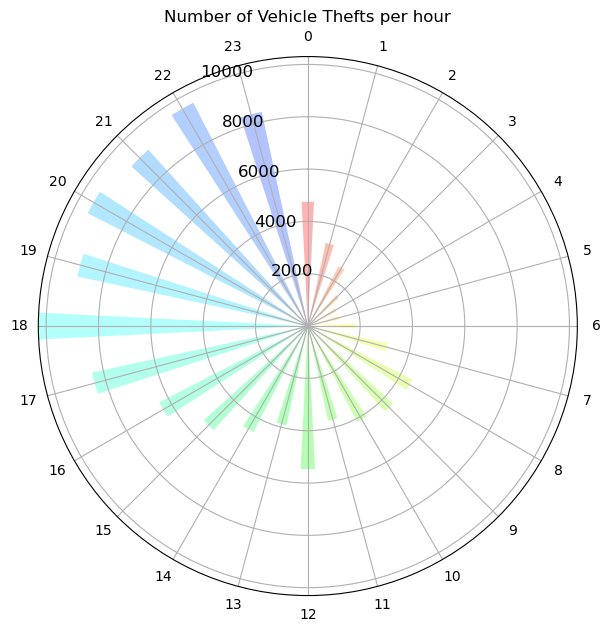

In [37]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(111, projection = 'polar')
# Colors
COLORS = plt.cm.hsv(trans/3/np.pi)
#ax.bar(df_hour_polar_grouped['hour'], df_hour_polar_grouped['Vehicle_theft_Crimes_per_hour'], width = 0.1, alpha=0.3, color='red', label='Vehicle Theft')
ax.bar(trans, df_hour_polar_grouped['Vehicle_theft_Crimes_per_hour'], width = 0.1, alpha=0.3, color=COLORS)
# Make the labels go clockwise
ax.set_theta_direction(-1)

#Place Zero at Top
ax.set_theta_offset(np.pi/2)

#Set the circumference ticks
ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=False))
ax.set_yticks([0, 2000, 4000, 6000, 8000, 10000])

# set the label names
ax.set_xticklabels(range(24))

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 10
ax.text(-0.2 * np.pi / 2, 2000 + PAD, "2000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 4000 + PAD, "4000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 6000 + PAD, "6000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 8000 + PAD, "8000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 10000 + PAD, "10000", ha="center", size=12)

ax.set_title('Number of Vehicle Thefts per hour')
#Bars to the wall
plt.ylim(0,np.max(df_hour_polar_grouped['Vehicle_theft_Crimes_per_hour']))

#plt.legend(bbox_to_anchor=(1,0), fancybox=True, shadow=True)
plt.show()

## A1 Part 2: Dataviz questions 

Have a look at the encoding dataviz lecture (Week 4), then answer the following questions in your own words. 

* 1 - Mention 10 examples of ways we can encode data.
* 2 - Are all encodings created equally? Why not? Can you think of an example from the previous lectures?
* 3 - Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?
* 4 - Explain in your own words: What is the problem with pie-charts?

### 1 - Mention 10 examples of ways we can encode data.
From the video we have he following examples of encoding:
- Position
- Length 
- Area 
- Shape 
- Color 
- Angle 
- Line weight 
- Line ending 
- Texture 
- Pattern 

Aditionally, we can see different econdings, such as:
- *One-Hot Encoding:* This encoding technique creates a binary column for each category of a categorical feature. Each column represents a category, and the presence of a value in a column indicates that the corresponding category is present.
- *Label Encoding:* Label encoding replaces each category in a categorical feature with a numerical value. Each unique category is assigned a unique integer value.
- *Binary Encoding:* In binary encoding, each unique category is assigned a binary representation, and each bit in the representation corresponds to a power of 2. This encoding results in a fewer number of columns compared to one-hot encoding.
- *Ordinal Encoding:* Ordinal encoding assigns a unique integer value to each category, but the integers are assigned in order of the category's rank or position.
- *Count Encoding:* In count encoding, each category is assigned a count of its frequency in the dataset. This encoding can capture the relationship between the frequency of a category and the target variable.
- *Target Encoding:* Target encoding replaces each category with the mean target value of the dataset for that category. This encoding can capture the relationship between a categorical feature and the target variable.
- *Feature Hashing:* Feature hashing uses a hashing function to convert categorical values to a fixed-length numerical representation. This technique is useful when the number of unique categories is very large.
- *Helmert Encoding:* Helmert encoding replaces each category with the difference between the mean of that category and the mean of all the preceding categories.
- *Polynomial Encoding:* In polynomial encoding, each category is replaced with a set of orthogonal polynomials of increasing order.
- *Backward Difference Encoding:* In backward difference encoding, each category is replaced with the difference between its value and the value of the previous category.

Overall, the choice of encoding technique depends on the type and nature of the data and the machine learning algorithm being used. It is important to evaluate the performance of different encoding techniques to determine which one is the best fit for a given dataset and problem.

### 2 - Are all encodings created equally? Why not? Can you think of an example from the previous lectures?

Not all encodings are created equally. Some encodings are good at reavling some aspects while others are good at reavilng others. An example cxould be the one that is shown in the Lecture 4 in Part 1. Where we can see an encoding of 5 elements: A, B, C, D & E in a pie chart. While that won't give any intuitive or easily understanding of the amount of each variable, if we transform that angle encoding (piechart) into a lenth encoding (bar chart) we can clearly distinguish the amounts of each variable. Another encoding, it´s a network encoding, which will give us a really good understanding about realtion between elements. 

###  3 - Mention 3 encodings that are difficult for the human eye to parse. Can you find an example of a visualization online that uses one of those three?

Here are three different encondings that may be difficult to the human eye to parse: <br>
#### -**Area** <br>
If we usea area as an encoder it will be hard to see the diferences, because some tinny changes in area that might be significant to the result might not be significant to the eye. The following video perfectly shows how tinny changes in area are not percieved by human eye. 

[![IMAGE ALT TEXT HERE](https://i.dailymail.co.uk/i/pix/2016/05/04/17/33D63B4200000578-0-image-a-106_1462379588842.jpg)](https://www.youtube.com/shorts/6aDB9VLnyZQ)

#### -**Angle**<br> 
Pie charts use the anlge of the slices of the pie to quantify the amount of value that has changed. It is not a good aprroach as differences in the angles are difficult to see. <br>
<img src="https://i.insider.com/51bf13026bb3f7257a000030?width=600&format=jpeg&auto=webp" alt="drawing" width="600"/>

#### -Saturation<br> 
This is because our eyes have difficulty distinguishing subtle differences in color saturation, especially if the colors are very similar. 

### 4 - Explain in your own words: What is the problem with pie-charts?

Pie charts are a popular way to represent data, but they have several potential problems:

Limited ability to show large amounts of data: Pie charts are best used for displaying a few categories of data. If you have too many categories, the chart can become cluttered and difficult to read.

Difficulty comparing data: It can be difficult to compare the size of different slices of the pie chart. It's often easier to compare data using a bar chart or a line chart.

Misleading visual representation: Depending on the size of the slices and the order they are presented in, pie charts can be misleading. The human eye can easily be fooled by the way the slices are arranged.

Inability to show trends over time: Pie charts are not well-suited for displaying trends over time. If you want to show how data changes over time, it's better to use a line chart.

Difficulty displaying negative values: Pie charts can only show positive values. If you need to display negative values, you will need to use a different type of chart, such as a bar chart.

We can se an example of how bad pie charts can be in the next photo:

<img src="https://flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart-620x465.png" alt="drawing" width="400"/>

## A1 Part 3: Visualizing geodata using Plotly

In this sub-assignment I want you to create a choropleth map of San Francisco, showing where it's safest to leave your car on Sundays, following the instructions from Week 3.

When you're done, reflect on the following questions.

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
* Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):
   - Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
   - Why do you think perceptual errors are a problem? Try to think of a few examples. 

## A1 Part 4: Errors in the data

We started the course by plotting simple histogram and bar plots that showed a lot of cool patterns. But sometimes the binning can hide imprecision, irregularity, and simple errors in the data that could be misleading. In the work we've done so far, we've already come across at least three examples of this in the SF data (listed in Part 3 of Week 4). 

The data errors we discovered at the end of Week 4 become difficult to notice when we aggregate data (and when we calculate mean values, as well as statistics more generally). Thus, when we visualize, errors become difficult to notice when binning the data. We explore this process in the exercise below.

* In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. 
* Also, briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).
* Find your own example of human noise in the data and visualize it.

Binning is a process of grouping continuous data into discrete bins or intervals. Binning is often used to simplify data analysis by reducing the number of data points to be analyzed. However, when data contain errors, binning can lead to biased results.

For our dataset the data errors in the PROSTITUTION category on Thursdays can bias binned data is by causing misclassification of data points. For example, if we have a bar chart with daily bins and some crimes are classified on Thursday's bin by mistake, it will be misclassified into the wrong bin. Also, these data errors affect the validity of other visualizations for other useful variables such as the PDDISTRINCT variable due to the misclassification of crimes. This misclassification problem can lead to an underestimation or overestimation of the true value of the bin.

In addition, these data errors can reduce the accuracy of binned data by introducing noise into the data. This noise can make it more difficult to detect meaningful patterns in the data, leading to reduced statistical power and increased uncertainty in the results.

Overall, it is important to carefully consider the potential impact of data errors on binned data and to take steps to minimize their impact, such as using more accurate measurement techniques or carefully selecting bin boundaries.

### In the temporal activity for PROSTITUTION something surprising is going on on Thursday.

Text(0, 0.5, 'Count')

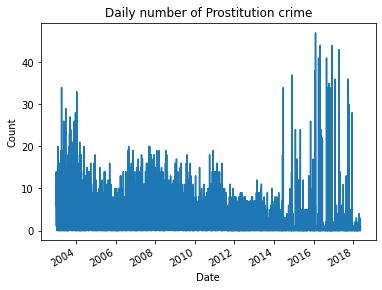

In [34]:
# Daily time series
data_select_cat = (df['Category'] == "PROSTITUTION")
data_select = df.loc[data_select_cat]
col_ser=['Date_Time','PdId']
series=data_select[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of Prostitution crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

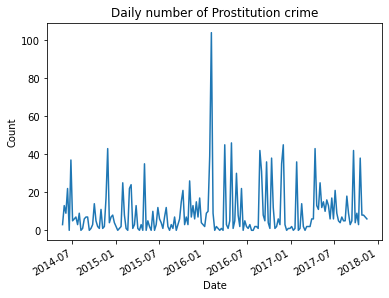

In [35]:
# Zoom the above time series
# Select DataFrame rows between two dates
start_date = '2014-5-15'
end_date   = '2017-11-15'
mask = (data_select['Date_Time'] > start_date) & (data_select['Date_Time'] <= end_date)

# Using pandas.DataFrame.loc[] to Filter Rows by Dates
df2 = data_select.loc[mask]

col_ser=['Date_Time','PdId']
series=df2[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('W-Thu').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of Prostitution crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count')

In [36]:
daily.idxmax()

PdId   2016-02-04
dtype: datetime64[ns]

In [37]:
#df['Date'] = df['Date_Time'].dt.date
#data_select_cat = (df['Date']=='2016-02-04')
#data_select = df.loc[data_select_cat]
df_week_grouped_pddistrict = data_select[(data_select['Date_Time']>='04-02-2016') & (data_select['Date_Time']<='04-03-2016')].groupby(['PdDistrict', 'DayOfWeek']).size().unstack()
#data_select
df_week_grouped_pddistrict 

DayOfWeek
PdDistrict


In [38]:
gri = df[(df['Date_Time']>='2016-02-04') & (df['Date_Time']<='2016-02-07')].groupby(['PdDistrict', 'DayOfWeek']).size().unstack()
gri

DayOfWeek,3,4,5
PdDistrict,,,
BAYVIEW,53,41,27
CENTRAL,36,38,60
INGLESIDE,39,32,39
MISSION,52,40,48
NORTHERN,55,64,60
PARK,27,30,12
RICHMOND,25,40,14
SOUTHERN,88,107,113
TARAVAL,74,42,31


Generally, in the Machine Learning the Bias from noise errors can lead to bad inferences and suboptimal decision making. According to crime dataset, we could notice for the PROSTITUTION category a surprising peak which is going on on Thursday. This phenomenon can lead to high bias in the other versions of the data like PdDISTRINCT category. 

### Find your own example of human noise in the data and visualize it.

<AxesSubplot:title={'center':'NUmber of drunkenness crimes by year'}, xlabel='Year', ylabel='Count Drukkeness'>

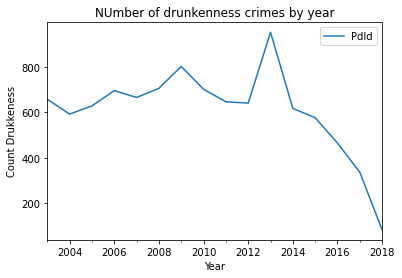

In [39]:
# Yearly time series
data_select_cat = (df['Category'] == "DRUNKENNESS")
data_select = df.loc[data_select_cat]
col_ser=['Date_Time','PdId']
series=data_select[col_ser]
series=series.set_index('Date_Time')
series.head()

monthly=series.resample('Y').count()
monthly.plot(title = 'NUmber of drunkenness crimes by year', xlabel = 'Year', ylabel = 'Count Drukkeness')

#df_week_grouped = df[df.Category.isin(focuscrimes)].groupby(['Category', 'DayOfWeek']).size().reset_index()
#df_week_grouped

Text(0, 0.5, 'Count Vehicle Thefts')

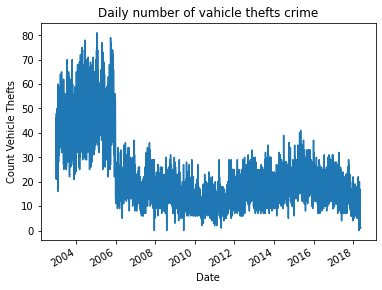

In [40]:
# Daily time series
data_select_cat = (df['Category'] == "VEHICLE THEFT")
data_select = df.loc[data_select_cat]
col_ser=['Date_Time','PdId']
series=data_select[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of vehicle thefts crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to the chart
plt.xlabel('Date')
plt.ylabel('Count Vehicle Thefts')

In [41]:
df.Category.unique()

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

Text(0, 0.5, 'Count Vehicle Thefts')

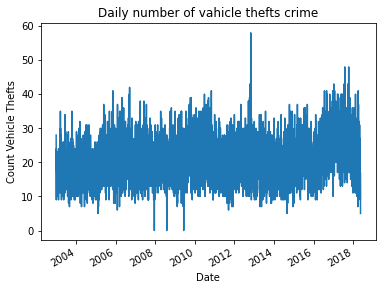

In [42]:
# Daily time series
data_select_cat = (df['Category'] == "VANDALISM")
data_select = df.loc[data_select_cat]
col_ser=['Date_Time','PdId']
series=data_select[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of vahicle thefts crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count Vehicle Thefts')

Text(0, 0.5, 'Count Vehicle Thefts')

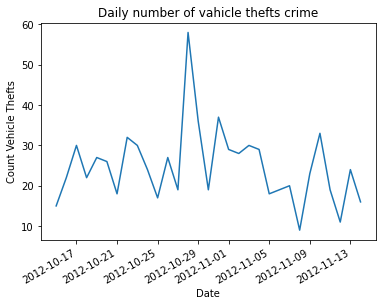

In [43]:
# Zoom the above time series
# Select DataFrame rows between two dates
start_date = '2012-10-15'
end_date   = '2012-11-15'
mask = (data_select['Date_Time'] > start_date) & (data_select['Date_Time'] <= end_date)

# Using pandas.DataFrame.loc[] to Filter Rows by Dates
df2 = data_select.loc[mask]

col_ser=['Date_Time','PdId']
series=df2[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of vahicle thefts crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count Vehicle Thefts')

In [44]:
np.max(daily)
daily.idxmax()

PdId   2012-10-28
dtype: datetime64[ns]

In [45]:
daily

,PdId
Date_Time,
2012-10-15,15
2012-10-16,22
2012-10-17,30
2012-10-18,22
2012-10-19,27
2012-10-20,26
2012-10-21,18
2012-10-22,32
2012-10-23,30


Text(0, 0.5, 'Count Vehicle Thefts')

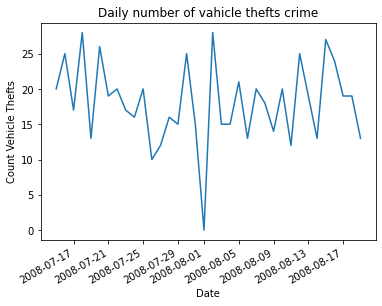

In [46]:
### find zero values
# Zoom the above time series
# Select DataFrame rows between two dates
start_date = '2008-07-15'
end_date   = '2008-08-20'
mask = (data_select['Date_Time'] > start_date) & (data_select['Date_Time'] <= end_date)

# Using pandas.DataFrame.loc[] to Filter Rows by Dates
df2 = data_select.loc[mask]

col_ser=['Date_Time','PdId']
series=df2[col_ser]
series=series.set_index('Date_Time')
series.head()

daily=series.resample('D').count()

# Plotting the time series of given dataframe
plt.plot(daily.index, daily.values)
 
# Giving title to the chart using plt.title
plt.title('Daily number of vahicle thefts crime')
 
# rotating the x-axis tick labels at 30degree
# towards right
plt.xticks(rotation=30, ha='right')
 
# Providing x and y label to te chart
plt.xlabel('Date')
plt.ylabel('Count Vehicle Thefts')

In [47]:
daily

,PdId
Date_Time,
2008-07-15,20
2008-07-16,25
2008-07-17,17
2008-07-18,28
2008-07-19,13
2008-07-20,26
2008-07-21,19
2008-07-22,20
2008-07-23,17


In [48]:
np.max(daily)
daily.idxmin()

PdId   2008-08-01
dtype: datetime64[ns]

In [49]:
np.max(daily)
daily.idxmax()

PdId   2008-07-18
dtype: datetime64[ns]

In [50]:
df.columns

Index(['Date_Time', 'PdId', 'IncidntNum', 'Incident Code', 'Category',
       'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       'Ne